In [1]:
import pandas as pd #import pandas to help manipulate the date set
import missingno as msno #import missingno to identify and visualize missing data 

In [2]:
#bring in the qb dataset as a pandas dataframe 
df = pd.read_csv('https://raw.githubusercontent.com/oconnorac/fantasy-football-success-predictor/main/data/stats_vs_projections/qb_stats_and_projections.csv')

In [3]:
#see how many rows and columns are in this dataset

shape_info = df.shape #set the dataframe's "shape" to a variable

print('This dataset evaluates {} quarterbacks based on data from {} columns'#print this phrase with variables added in
      .format(shape_info[0],#using the format method insert the number of rows in the dataframe
              shape_info[1])) #using the format method insert the number of columns in the dataframe

This dataset evaluates 124 quarterbacks based on data from 23 columns


In [4]:
df.head(3) #look at the first 3 rows of the qb dataset

,Unnamed: 0,PLAYER NAME,TEAM NAME,PLAYER POSITION,2019 COMPLETED PASS,2019 ATTEMPTED PASS,2019 PASSING YDS,2019 PASSING TD,2019 INT,2019 CAR,...,2020 COMPLETED PASS,2020 ATTEMPTED PASS,2020 PASSING YDS,2020 PASSING TD,2020 INT,2020 CAR,2020 RUSH YDS,2020 RUSH TD,2020 FPTS,2020 OUTLOOK
0,1,Lamar Jackson,Ravens,QB,265.0,401.0,3127.0,36.0,6.0,176.0,...,296.0,465.0,3425.0,25.0,10.0,156.0,902.0,6.0,338.23,The 2019 NFL MVP is fresh off a breakout seaso...
1,2,Patrick Mahomes,Chiefs,QB,319.0,484.0,4031.0,26.0,5.0,43.0,...,364.0,557.0,4465.0,32.0,10.0,61.0,280.0,3.0,332.66,Patrick Mahomes is 24 years old and has 36 NFL...
2,3,Deshaun Watson,Texans,QB,333.0,495.0,3852.0,26.0,12.0,82.0,...,337.0,517.0,4018.0,27.0,12.0,87.0,519.0,4.0,314.06,Watson enters his fourth NFL season fresh off ...


In [5]:
df.tail(3) #look at the bottom 3 rows of the qb dataset

,Unnamed: 0,PLAYER NAME,TEAM NAME,PLAYER POSITION,2019 COMPLETED PASS,2019 ATTEMPTED PASS,2019 PASSING YDS,2019 PASSING TD,2019 INT,2019 CAR,...,2020 COMPLETED PASS,2020 ATTEMPTED PASS,2020 PASSING YDS,2020 PASSING TD,2020 INT,2020 CAR,2020 RUSH YDS,2020 RUSH TD,2020 FPTS,2020 OUTLOOK
121,122,Sam Bradford,FA,QB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
122,123,Nick Fitzgerald,FA,QB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
123,124,Tyree Jackson,Bills,QB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.


In [6]:
list(df) #list out all of the columns in the dataset

['Unnamed: 0',
 'PLAYER NAME',
 'TEAM NAME',
 'PLAYER POSITION',
 '2019 COMPLETED PASS',
 '2019 ATTEMPTED PASS',
 '2019 PASSING YDS',
 '2019 PASSING TD',
 '2019 INT',
 '2019 CAR',
 '2019 RUSH YDS',
 '2019 RUSH TD',
 '2019 FPTS',
 '2020 COMPLETED PASS',
 '2020 ATTEMPTED PASS',
 '2020 PASSING YDS',
 '2020 PASSING TD',
 '2020 INT',
 '2020 CAR',
 '2020 RUSH YDS',
 '2020 RUSH TD',
 '2020 FPTS',
 '2020 OUTLOOK']

In [7]:
df = df.drop(['Unnamed: 0', '2020 OUTLOOK'], axis=1) #delete any unwanted columns like 2020 Outlook and Unnamed

In [8]:
new_shape = df.shape[1] #set number of columns to a variable

print('{} columns have been removed from the dataset'# print a phrase saying how many columns have been removed
      .format( # use the .format() method again to insert variables into a printed string
          abs(new_shape-shape_info[1]))) # show the absolute value between the old and new amounts of columns

2 columns have been removed from the dataset


In [9]:
#remove spaces from old column names

df_old_cols = list(df) # instantiate a new list with old column names in it


df_new_cols = [x.replace(" ", "").capitalize() for x in df_old_cols] # remove the spaces and make everything lowercase

In [10]:
df_new_cols[0] # make sure it worked by checking the first name

'Playername'

In [11]:
df.columns = df_new_cols # make df_new_cols the column names
df.head(2) # check to make sure that this change stuck

,Playername,Teamname,Playerposition,2019completedpass,2019attemptedpass,2019passingyds,2019passingtd,2019int,2019car,2019rushyds,...,2019fpts,2020completedpass,2020attemptedpass,2020passingyds,2020passingtd,2020int,2020car,2020rushyds,2020rushtd,2020fpts
0,Lamar Jackson,Ravens,QB,265.0,401.0,3127.0,36.0,6.0,176.0,1206.0,...,415.68,296.0,465.0,3425.0,25.0,10.0,156.0,902.0,6.0,338.23
1,Patrick Mahomes,Chiefs,QB,319.0,484.0,4031.0,26.0,5.0,43.0,218.0,...,287.04,364.0,557.0,4465.0,32.0,10.0,61.0,280.0,3.0,332.66


<AxesSubplot:>

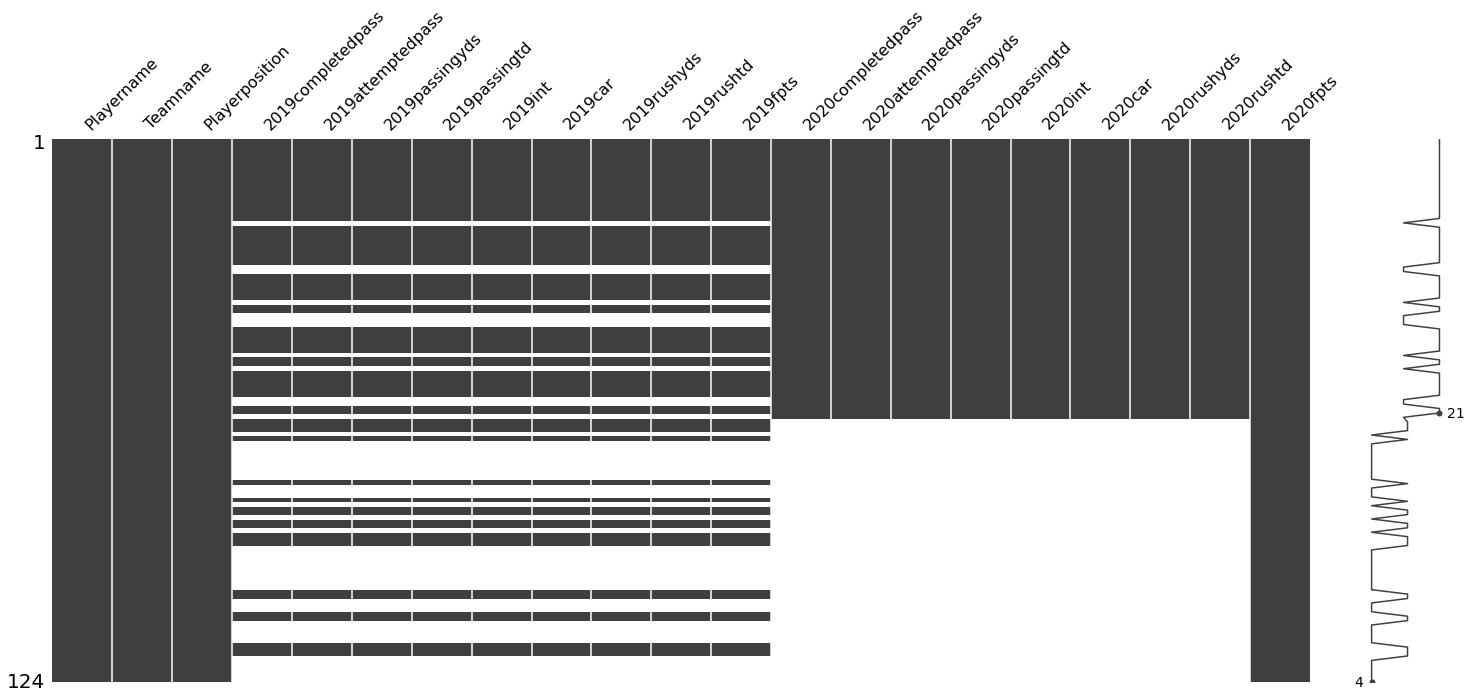

In [12]:
msno.matrix(df) # print a missing numbers matrix to show where missing numbers are

In [13]:
df[df['2019fpts'].isna()] # show the dataframe where the 2019fpts is null

,Playername,Teamname,Playerposition,2019completedpass,2019attemptedpass,2019passingyds,2019passingtd,2019int,2019car,2019rushyds,...,2019fpts,2020completedpass,2020attemptedpass,2020passingyds,2020passingtd,2020int,2020car,2020rushyds,2020rushtd,2020fpts
19,Joe Burrow,Bengals,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,328.0,527.0,3687.0,20.0,13.0,54.0,258.0,2.0,232.82
29,Tua Tagovailoa,Dolphins,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,288.0,467.0,3263.0,17.0,12.0,35.0,139.0,1.0,190.55
30,Justin Herbert,Chargers,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,265.0,421.0,3069.0,16.0,11.0,40.0,157.0,1.0,182.23
37,P.J. Walker,Panthers,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,57.0,97.0,656.0,3.0,3.0,7.0,29.0,0.0,37.48
40,Jalen Hurts,Eagles,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26.0,43.0,301.0,2.0,1.0,12.0,68.0,1.0,27.61
41,Joshua Dobbs,Jaguars,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,39.0,65.0,425.0,2.0,2.0,3.0,13.0,0.0,22.57
42,Blaine Gabbert,Buccaneers,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,28.0,46.0,339.0,2.0,2.0,2.0,9.0,0.0,20.63
49,Geno Smith,Seahawks,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.0,27.0,188.0,2.0,1.0,1.0,3.0,0.0,12.48
52,Chad Henne,Chiefs,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.0,29.0,188.0,2.0,1.0,1.0,4.0,0.0,11.97
59,Jordan Love,Packers,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.0,27.0,183.0,1.0,1.0,1.0,5.0,0.0,10.87


In [14]:
df= df.fillna(0) # use the .fillna() method to fill the NaNs with zeros

In [15]:
df.tail(3) # check out the last 3 rows in the dataset to ensure this filling of null values stuck

,Playername,Teamname,Playerposition,2019completedpass,2019attemptedpass,2019passingyds,2019passingtd,2019int,2019car,2019rushyds,...,2019fpts,2020completedpass,2020attemptedpass,2020passingyds,2020passingtd,2020int,2020car,2020rushyds,2020rushtd,2020fpts
121,Sam Bradford,FA,QB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,Nick Fitzgerald,FA,QB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,Tyree Jackson,Bills,QB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.to_csv('cleaned-quarterback-data.csv') #export to csv

In [17]:
!echo %CD% #export to computer

C:\Users\griff #export to computer
